<a href="https://colab.research.google.com/github/VeraaaaWei/data_analytics/blob/Python/(Simplified)Click%20on%20fake%20ads%20or%20not%20Machine_Learning_Logistic_Regressiont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dear Admission Office:

I would like to show you more about my programming ability, but two pages are so limited. So please visit my Github: https://github.com/VeraaaaWei/data_analytics. Meanwhile, companies don't allow me to upload the codes I've written during my internships. So if you want to know more about it, please also let me know and I'll continue talking about it with my supervisor and try desensitization.

**A Simplified Machine_Learning_Logistic_Regression_Model - Who is more likely to click on fake advertisements?**

In [155]:
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Get the Data and preprocessing it
df_raw = pd.read_csv("https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv")
df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(' ','_').str.replace('/','_').str.replace('%','pct')
ad_data = df_raw

#Check the data
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area_income               1000 non-null   float64
 3   daily_internet_usage      1000 non-null   float64
 4   ad_topic_line             1000 non-null   object 
 5   city                      1000 non-null   object 
 6   male                      1000 non-null   int64  
 7   country                   1000 non-null   object 
 8   timestamp                 1000 non-null   object 
 9   clicked_on_ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Exploratory Data Analysis

In [159]:
#Check if there is any null value
ad_data.isnull().sum()

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
ad_topic_line               0
city                        0
male                        0
country                     0
timestamp                   0
clicked_on_ad               0
dtype: int64

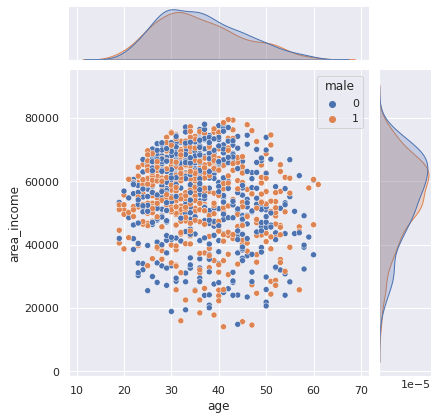

In [151]:
#Create a jointplot showing Area Income versus Age
sns.set_style('darkgrid')
sns.jointplot(x='age', y='area_income', hue = 'male', data =ad_data )

Model building

In [148]:
#Split the data into training set and testing set using train_test_split
ds = ad_data
y = ds['clicked_on_ad']
X = ds[['daily_time_spent_on_site', 'age', 'area_income','daily_internet_usage','male']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Train and fit a logistic regression model on the training set
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluate the Training Model

In [ ]:
y_test_predict = logmodel.predict(X_test)      #AN = 135+1 = 136, Accuracy = TP+TN / Total = 110+135/136+114 = 0.98
print(classification_report(y_test,y_test_predict))  #AY = 4+110 = 114, Rate of error = 1-0.98=0.02
print(confusion_matrix(y_test, y_test_predict))    #PN = 135+9 =144, Specificity = TN/ACTUARL NO = 135/136 = 0.9926
                            #PY = 1+110 = 111   Sensitivity = 110/114 = 0.96

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



[[135   1]
 [  4 110]]
